In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from math import sqrt
import yfinance as yf

In [ ]:
# Define the ticker symbol for Bitcoin
tickerSymbol = 'EURUSD=X'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
df = tickerData.history(period='2y', interval='1d')
# 'Date' is already datetime index

# Drop 'Volume', 'Dividends', 'Stock Splits'
df = df.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1)

# See the OHLC data
display(df)

,Open,High,Low,Close
Date,,,,
2022-11-14 00:00:00+00:00,1.032855,1.035025,1.027359,1.032855
2022-11-15 00:00:00+00:00,1.031928,1.047548,1.031385,1.031928
2022-11-16 00:00:00+00:00,1.035786,1.043732,1.033645,1.035786
2022-11-17 00:00:00+00:00,1.039501,1.040572,1.030949,1.039501
2022-11-18 00:00:00+00:00,1.036173,1.039587,1.032802,1.036173
...,...,...,...,...
2024-11-07 00:00:00+00:00,1.073307,1.082603,1.071409,1.073307
2024-11-08 00:00:00+00:00,1.079517,1.079739,1.071042,1.079517
2024-11-11 00:00:00+00:00,1.071490,1.072846,1.062880,1.071490


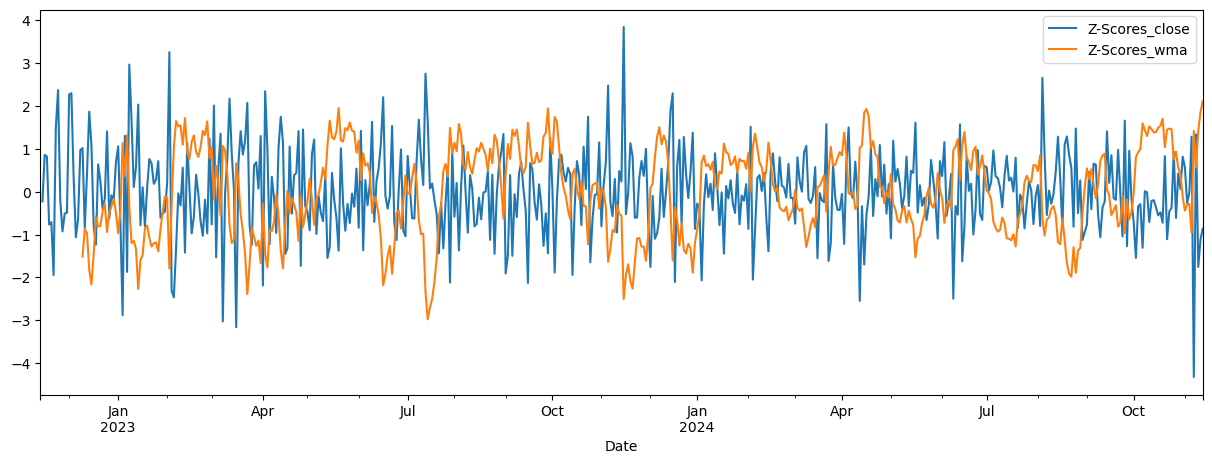

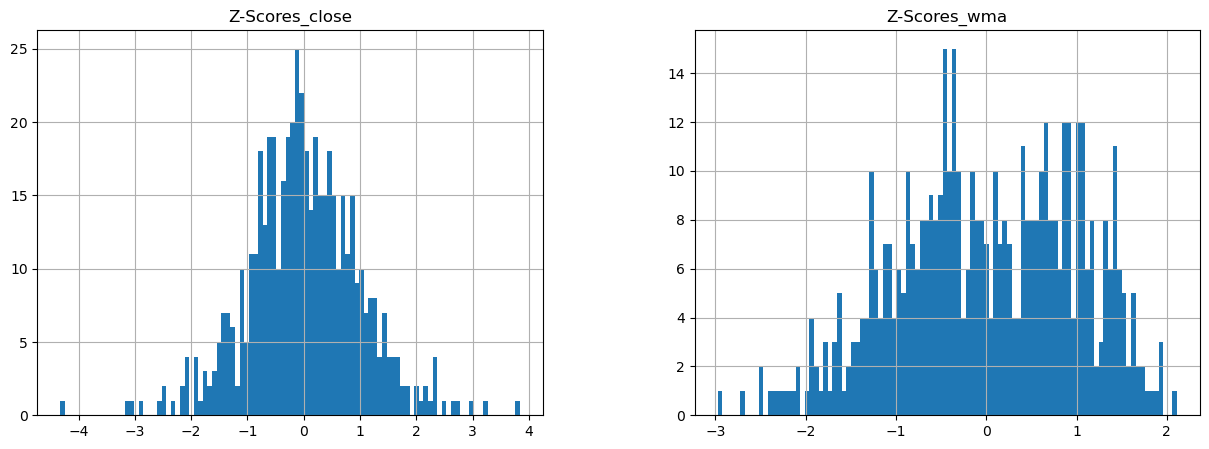

,Open,High,Low,Close,WMA_21,var_close,var_wma,Z-Scores_close,Z-Scores_wma
Date,,,,,,,,,
2022-11-14 00:00:00+00:00,1.032855,1.035025,1.027359,1.032855,NaN,NaN,NaN,NaN,NaN
2022-11-15 00:00:00+00:00,1.031928,1.047548,1.031385,1.031928,NaN,-0.089783,NaN,-0.224807,NaN
2022-11-16 00:00:00+00:00,1.035786,1.043732,1.033645,1.035786,NaN,0.373918,NaN,0.859567,NaN
2022-11-17 00:00:00+00:00,1.039501,1.040572,1.030949,1.039501,NaN,0.358634,NaN,0.823825,NaN
2022-11-18 00:00:00+00:00,1.036173,1.039587,1.032802,1.036173,NaN,-0.320173,NaN,-0.763579,NaN
...,...,...,...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,1.073307,1.082603,1.071409,1.073307,1.084169,-1.841790,1.001891,-4.321911,1.416066
2024-11-08 00:00:00+00:00,1.079517,1.079739,1.071042,1.079517,1.083633,0.578616,0.379852,1.338258,0.569643
2024-11-11 00:00:00+00:00,1.071490,1.072846,1.062880,1.071490,1.082399,-0.743613,1.007900,-1.753803,1.424242


In [ ]:
# Data Cleansing
#df[['wma', 'close']] = df[['wma', 'close']].replace(',', '.', regex=True).astype(float)

# Define the weights for the WMA
weights = np.arange(1, 21)  # This creates an array [1, 2, 3, ..., 20]

def calculate_wma(data):
    return np.sum(weights * data) / np.sum(weights)

def calculate_sma(data, close='Close', window=20):
    return data[close].rolling(20).mean()

# Calculate the WMA
df['WMA_21'] = df['Close'].rolling(20).apply(calculate_wma, raw=True)

# Calculating returns as var (%) Inferential Statistics
df["var_close"] = df["Close"].pct_change(1) * 100
df["var_wma"] = (1 - (df['Close'] / df['WMA_21'])) * 100 # Distance between Close and WMA_21, but i call it 'var'.

# Z-Scores
df['Z-Scores_close'] = (df['var_close'] - df['var_close'].mean()) / df['var_close'].std()
df['Z-Scores_wma'] = (df['var_wma'] - df['var_wma'].mean()) / df['var_wma'].std()

# Remove NaN
#df.dropna(subset=["var_close", "var_wma"], inplace=True)

# Z-Scores Plots
df[['Z-Scores_close', 'Z-Scores_wma']].plot(figsize = (15, 5))
plt.show()

# Z-Scores Histograms
df[['Z-Scores_close', 'Z-Scores_wma']].hist(figsize = (15, 5), bins = 100)
plt.show()

# Plot
display(df)

In [14]:
# Z-Scores values 
# Simple Z-Score based on Closing Price only 

parameters = [1.618, 2, 3]

for i in parameters:
    if i == 1.618:
        df_Zclose_1618_short = df[df['Z-Scores_close'] <= 1.618].sort_values(by = 'Z-Scores_close', ascending=False) #filtering
        df_Zclose_1618_long = df[df['Z-Scores_close'] >= (-1 * 1.618)].sort_values(by = 'Z-Scores_close', ascending=True)
        
        # Advanced Z-Score based on the distance between Closing Price and the Actual Price of the Weighted Moving Average
        df_Zwma_1618_long = df[df['Z-Scores_wma'] <= 1.618].sort_values(by = 'Z-Scores_wma', ascending=False)
        df_Zwma_1618_short = df[df['Z-Scores_wma'] >= (-1 * 1.618)].sort_values(by = 'Z-Scores_wma', ascending=True)
        
    elif i == 2:
        df_Zclose_2_short = df[df['Z-Scores_close'] <= 2].sort_values(by = 'Z-Scores_close', ascending=False) #filtering
        df_Zclose_2_long = df[df['Z-Scores_close'] >= (-1 * 2)].sort_values(by = 'Z-Scores_close', ascending=True)
        
        # Advanced Z-Score based on the distance between Closing Price and the Actual Price of the Weighted Moving Average
        df_Zwma_2_long = df[df['Z-Scores_wma'] <= 2].sort_values(by = 'Z-Scores_wma', ascending=False)
        df_Zwma_2_short = df[df['Z-Scores_wma'] >= (-1 * 2)].sort_values(by = 'Z-Scores_wma', ascending=True)
    
    else:
        df_Zclose_3_short = df[df['Z-Scores_close'] <= 3].sort_values(by = 'Z-Scores_close', ascending=False) #filtering
        df_Zclose_3_long = df[df['Z-Scores_close'] >= (-1 * 3)].sort_values(by = 'Z-Scores_close', ascending=True)
        
        # Advanced Z-Score based on the distance between Closing Price and the Actual Price of the Weighted Moving Average
        df_Zwma_3_long = df[df['Z-Scores_wma'] <= 3].sort_values(by = 'Z-Scores_wma', ascending=False)
        df_Zwma_3_short = df[df['Z-Scores_wma'] >= (-1 * 3)].sort_values(by = 'Z-Scores_wma', ascending=True)

print(f'''  *** LONG OPERATIONS (BUY) and SHORT OPERATIONS (SELL), Consider buying or selling *** {tickerSymbol} *** when the var(%) reaches the following levels. Keep in mind that POSITIVE number are for selling and NEGATIVE ones are for buying:
        
    *** Z-Score Definition: It is common to rescale a normal distribution so that the mean is 0 and the standard deviation is 1, which is known as *standard normal distribution*. This makes it easy to compare the spread of one normal distributiom to another normal distribution, even if they have different means and variances. 
        To sum up, the Z-Score expresses all x-values in terms of standard deviations. 
        
    *** Formula: Z = (x (data point) - mu (standard deviation)) / theta (standard deviation)
        
        Z-Score based on Closing of 1.618: *Sell* at variation (%) = {df_Zclose_1618_short['var_close'][0].round(4)}
        Z-Score based on Closing of 1.618: *Buy* at variation (%) = {df_Zclose_1618_long['var_close'][0].round(4)}
        
        Z-Score based on Closing of 2: *Sell* at variation (%) = {df_Zclose_2_short['var_close'][0].round(4)}
        Z-Score based on Closing of 2: *Buy* at variation (%) = {df_Zclose_2_long['var_close'][0].round(4)}
        
        Z-Score based on Closing of 3: *Sell* at variation (%) = {df_Zclose_3_short['var_close'][0].round(4)}
        Z-Score based on Closing of 3: *Buy* at variation (%) = {df_Zclose_3_long['var_close'][0].round(4)}
        
        ---------------------
        
        Z-Score based on Distance Closing x WMA of 1.618: *Sell* at variation (%) = {df_Zwma_1618_short['var_close'][0].round(4)}
        Z-Score based on Distance Closing x WMA of 1.618: *Buy* at variation (%) = {df_Zwma_1618_long['var_close'][0].round(4)}
        
        Z-Score based on Distance Closing x WMA of 2: *Sell* at variation (%) = {df_Zwma_2_short['var_close'][0].round(4)}
        Z-Score based on Distance Closing x WMA of 2: *Buy* at variation (%) = {df_Zwma_2_long['var_close'][0].round(4)}
        
        Z-Score based on Distance Closing x WMA of 3: *Sell* at variation (%) = {df_Zwma_3_short['var_close'][0].round(4)}
        Z-Score based on Distance Closing x WMA of 3: *Buy* at variation (%) = {df_Zwma_3_long['var_close'][0].round(4)}
        
        ''')

  *** LONG OPERATIONS (BUY) and SHORT OPERATIONS (SELL), Consider buying or selling *** EURUSD=X *** when the var(%) reaches the following levels. Keep in mind that POSITIVE number are for selling and NEGATIVE ones are for buying:
        
    *** Z-Score Definition: It is common to rescale a normal distribution so that the mean is 0 and the standard deviation is 1, which is known as *standard normal distribution*. This makes it easy to compare the spread of one normal distributiom to another normal distribution, even if they have different means and variances. 
        To sum up, the Z-Score expresses all x-values in terms of standard deviations. 
        
    *** Formula: Z = (x (data point) - mu (standard deviation)) / theta (standard deviation)
        
        Z-Score based on Closing of 1.618: *Sell* at variation (%) = 0.6959
        Z-Score based on Closing of 1.618: *Buy* at variation (%) = -0.6843
        
        Z-Score based on Closing of 2: *Sell* at variation (%) = 0.8099

C:\Users\subse\AppData\Local\Temp\ipykernel_10064\89281449.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Z-Score based on Closing of 1.618: *Sell* at variation (%) = {df_Zclose_1618_short['var_close'][0].round(4)}
C:\Users\subse\AppData\Local\Temp\ipykernel_10064\89281449.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Z-Score based on Closing of 1.618: *Buy* at variation (%) = {df_Zclose_1618_long['var_close'][0].round(4)}
C:\Users\subse\AppData\Local\Temp\ipykernel_10064\89281449.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

DOLAR STRATEGY

//@version=5 
strategy("cerquelefrangue_Z_WMA_TradingStrategy", overlay=true)
change= ((close-close[1])/close[1])*100

wma = ta.wma(length = 20, source = close)
plot(wma)
plot (strategy.equity)


// Setting Variables STD 
std1_long = -0.183522	
std1_short = 0.184002

std2_long = -0.227402 
std2_short = 0.227402 

std3_long = -0.339687	
std3_short = 0.340619

// Setting variance based on STD WMA
wma_long1 = -0.332094
wma_short1 = 0.332806

wma_long2 = -0.410440 
wma_short2 = 0.411398  

wma_long3 = -0.616723
wma_short3 = 0.617122

tprofit_varstd = 0.205710
variance = (1 - (close/wma)) * 100

// // Input to set maxTrades per day
// maxTrades = input.int(title="Max Intra-Day Trades", defval=20)
// strategy.risk.max_intraday_filled_orders(count=maxTrades)

// // Input for the strategy's maximum drawdown (in % of strategy equity)
// maxPercDd = input.int(title="Max Drawdown (%)", defval=25, minval=1, maxval=100)
// // Use the input's value with the maximum drawdown function
// strategy.risk.max_drawdown(value=maxPercDd, type=strategy.percent_of_equity)

// capital inicial = 4k
// operando 1 contrato

// Input for maximum intra-day loss (in currency)
maxLoss = input.int(title="Max Intra-Day Loss", defval=180) // mudar conforme o loss (loss ($) * 3) // 300 ou 450 

// Use the input's value with the maximum intra-day loss function
strategy.risk.max_intraday_loss(value=maxLoss, type=strategy.cash)

// Input variable stop loss
StopLoss = input.int(title="Stop Loss (ticks)", defval = 12) // 15 ou 30

// Input variable take profit
//TakeProfit = input.int(title="Take Profit (ticks)", defval = 8) // 8 ou 9 

/////// LONG & SHORT //////
///////////////////////////

// 3 std
EnterLong3 = change < std3_long
EnterShort3 = change > std3_short

EnterWMA3 = variance >= wma_short3
ShortWMA3 = variance <= wma_long3

// 2 std
EnterLong2 = change < std2_long
EnterShort2 = change > std2_short

EnterWMA2 = variance >= wma_short2
ShortWMA2 = variance <= wma_long2

// 1.168 std
EnterLong1 = change < std1_long
EnterShort1 = change > std1_short

EnterWMA1 = variance >= wma_short2
ShortWMA1 = variance <= wma_long2

trailingPoints = input(3)
trailingOffset = input(2)


if time(timeframe.period, "0900-1700") //hour(time) >= 09 and hour(time) <= 13
    if EnterLong3 or EnterWMA3 or EnterLong2 or EnterWMA2 //or EnterLong1 or EnterWMA1 
        strategy.entry("Enter Long", strategy.long)
        
    if EnterShort3 or ShortWMA3 or EnterShort2 or ShortWMA2 //or EnterShort1 or ShortWMA1 
        strategy.entry("Enter Short", strategy.short)
        

strategy.exit("TP / SL", trail_points = trailingPoints, trail_offset = trailingOffset, loss = StopLoss) //loss = StopLoss

# ---
# Python TESTS

In [ ]:
exchange_rates = {'x': 0.9, 'y': 1.5, 'z': 0.75}
amount = 1000
transactions = []

for exchange_rate in exchange_rates:
    transactions.append((exchange_rate, exchange_rates[exchange_rate] * amount))
    
for transaction in transactions:
    exchange_rate, amount = transaction
    print(f'{exchange_rate} equals to {amount}')

x equals to 900.0
y equals to 1500.0
z equals to 750.0


In [ ]:
exchange_rates = [0.9, 1.5, 0.75]
countries = ['x', 'y', 'z']
amount = 1000
transactions = []

for exchange_rate in exchange_rates:
    i = exchange_rates.index(exchange_rate)
    print(f'Country {countries[i]} has a transaction amount of $ {amount * exchange_rate}')

Country x has a transaction amount of $ 900.0
Country y has a transaction amount of $ 1500.0
Country z has a transaction amount of $ 750.0


In [ ]:
exchange_rates = [0.9, 1.5, 0.75]
countries = ['x', 'y', 'z']
amount = 1000
transactions = []

for i, exchange_rate in enumerate(exchange_rates):
    print(f'Country {countries[i]} has a transaction amount of $ {amount * exchange_rate}')

Country x has a transaction amount of $ 900.0
Country y has a transaction amount of $ 1500.0
Country z has a transaction amount of $ 750.0


In [ ]:
x = np.cumsum(np.array([0.0066, 0.0067, 0.0070, -0.0050]))
x

array([0.0066, 0.0133, 0.0203, 0.0153])

# ---
# Quantitative Trading TESTS

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Define the ticker symbol for Bitcoin
tickerSymbol = 'BTC-USD'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
data = tickerData.history(period='1y', interval='1d')

# Calculate moving averages
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

# Create signals
data['Buy_Signal'] = (data['50_MA'] > data['200_MA']).astype(int)
data['Sell_Signal'] = (data['50_MA'] < data['200_MA']).astype(int)

# Backtest strategy
data['Buy_Hold'] = data['Close'].pct_change() * data['Buy_Signal'].shift()
data['Sell_Hold'] = data['Close'].pct_change() * data['Sell_Signal'].shift()

# Calculate strategy performance
data['Strategy_Return'] = data['Buy_Hold'] + data['Sell_Hold']
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

data.tail()



,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_MA,200_MA,Buy_Signal,Sell_Signal,Buy_Hold,Sell_Hold,Strategy_Return,Cumulative_Return
Date,,,,,,,,,,,,,,,
2024-09-23 00:00:00+00:00,63643.101562,64733.558594,62628.078125,63329.800781,31400285425,0.0,0.0,59389.474297,63923.346230,0,1,-0.0,-0.005010,-0.005010,0.992296
2024-09-24 00:00:00+00:00,63326.839844,64695.214844,62737.417969,64301.968750,29938335243,0.0,0.0,59595.684531,63903.355605,0,1,0.0,0.015351,0.015351,1.007529
2024-09-25 00:00:00+00:00,64302.589844,64804.503906,62945.375000,63143.144531,25078377700,0.0,0.0,59737.861094,63876.576914,0,1,-0.0,-0.018022,-0.018022,0.989371
2024-09-26 00:00:00+00:00,63138.546875,65790.796875,62669.269531,65181.019531,36873129847,0.0,0.0,59940.932266,63857.383066,0,1,0.0,0.032274,0.032274,1.021302
2024-09-27 00:00:00+00:00,65179.781250,66397.171875,64877.437500,65956.328125,35472990208,0.0,0.0,60025.856094,63826.545176,0,1,0.0,0.011895,0.011895,1.033450


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


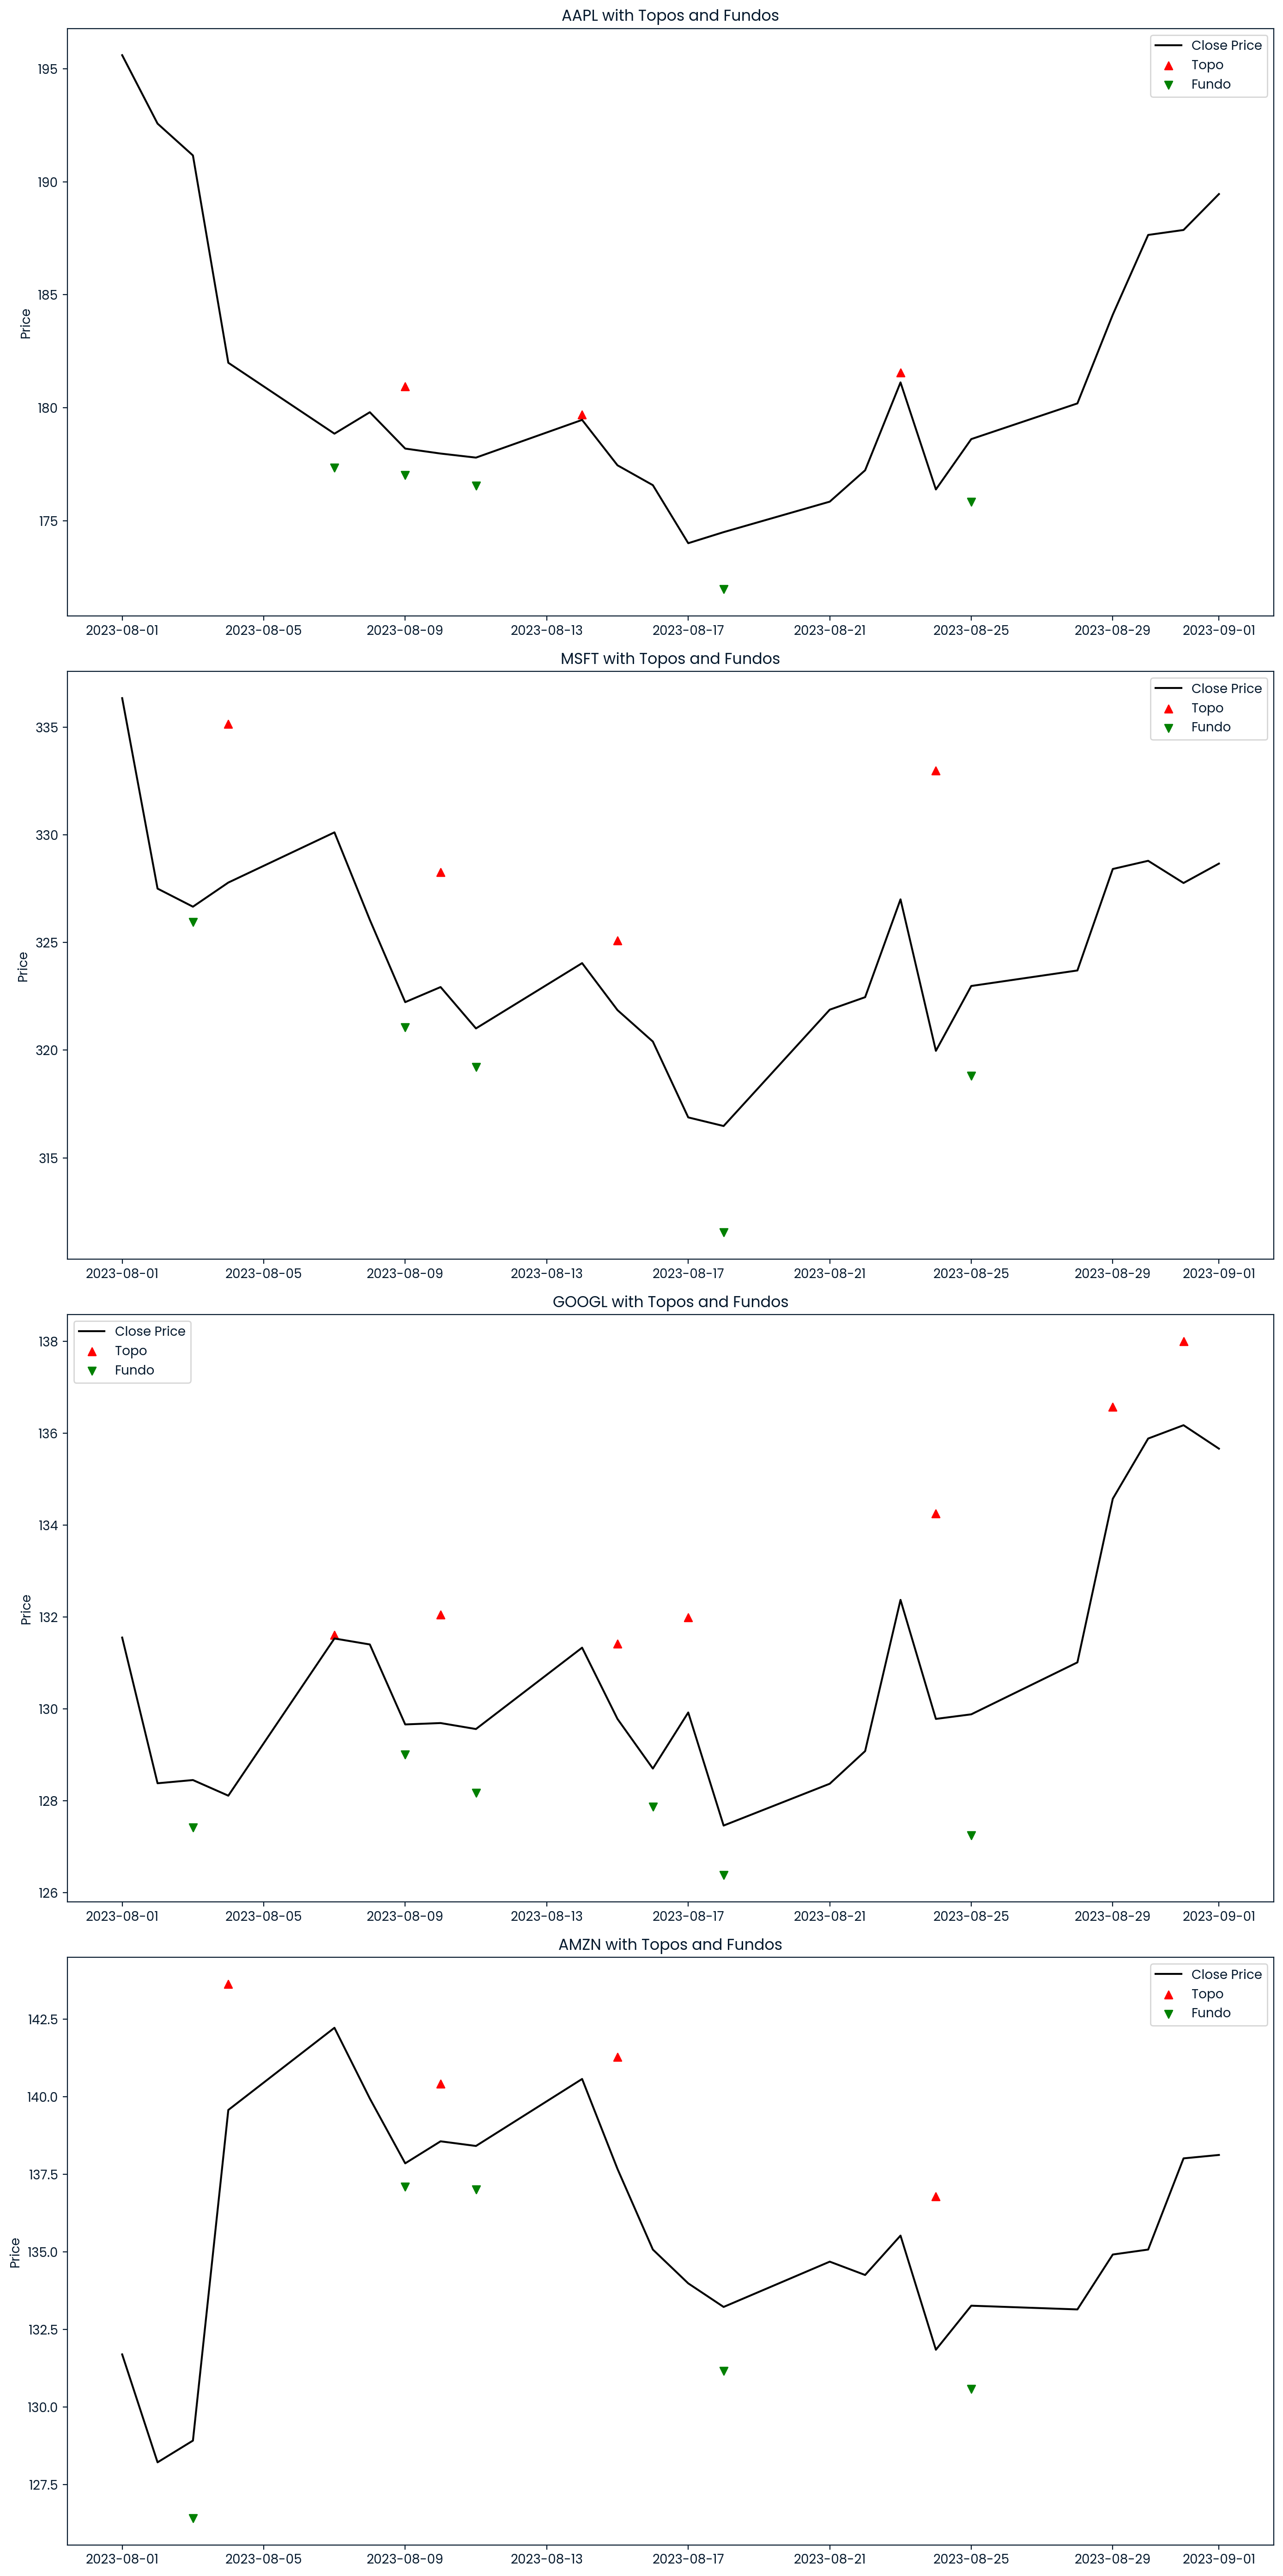

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of stock tickers you want to analyze
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']  # Add more tickers as needed

# Define the start and end dates for data download
start = '2023-08-01'
end = '2023-09-04'

# Dictionary to store dataframes for each ticker
dfs = {}

for ticker in tickers:
    # Download stock data
    df = yf.download(ticker, start=start, end=end)
    
    # Identify topos and fundos
    df['Topo'] = df['High'].where((df['High'] > df['High'].shift(1)) & (df['High'] > df['High'].shift(-1)))
    df['Fundo'] = df['Low'].where((df['Low'] < df['Low'].shift(1)) & (df['Low'] < df['Low'].shift(-1)))
    

    
    # Store the dataframe in the dictionary with the ticker as the key
    dfs[ticker] = df

# Now, dfs is a dictionary where each key is a ticker and the corresponding value is the dataframe for that stock
# For example, to access the dataframe for Apple:
apple_df = dfs['AAPL']

# Number of stocks
n_stocks = len(dfs)

# Create subplots
fig, axes = plt.subplots(n_stocks, 1, figsize=(14, 7 * n_stocks))

# If there's only one stock, axes won't be an array, so we convert it into a list for consistency
if n_stocks == 1:
    axes = [axes]

for ax, (ticker, df) in zip(axes, dfs.items()):
    ax.plot(df['Close'], label='Close Price', color='black')
    ax.scatter(df.index, df['Topo'], color='red', label='Topo', marker='^', alpha=1)
    ax.scatter(df.index, df['Fundo'], color='green', label='Fundo', marker='v', alpha=1)
    ax.set_title(f'{ticker} with Topos and Fundos')
    ax.set_ylabel('Price')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats

def black_scholes(S, K, T, r, sigma, option_type="call"):
    """
    Calculate the Black-Scholes price of an option.
    
    Parameters:
    - S: Current stock price
    - K: Option strike price
    - T: Time to expiration (in years)
    - r: Risk-free interest rate (annualized)
    - sigma: Volatility of the underlying stock (annualized)
    - option_type: "call" for call option, "put" for put option
    
    Returns:
    - Option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        return S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

def trading_signal(theoretical_price, market_price):
    """
    Generate a trading signal based on the difference between theoretical and market prices.
    
    Parameters:
    - theoretical_price: Price from the Black-Scholes model
    - market_price: Current market price of the option
    
    Returns:
    - "buy", "sell", or "hold" signal
    """
    if theoretical_price > market_price + 1:  # Threshold of $1 for simplicity
        return "buy"
    elif theoretical_price < market_price - 1:
        return "sell"
    else:
        return "hold"

# Example usage:
S = 100  # Current stock price
K = 105  # Option strike price
T = 0.5  # Time to expiration in years
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Stock volatility

call_price = black_scholes(S, K, T, r, sigma, "call")
market_price = 8  # Example market price

signal = trading_signal(call_price, market_price)
print(f"The trading signal for the option is: {signal}")


The trading signal for the option is: sell
